In [39]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [40]:
matches=pd.read_csv('matches.csv')

home_matches=matches.groupby( ['tournament_id', 'home_team_name'] ).agg({'match_id': 'count'}).reset_index() 
home_matches = home_matches.rename( columns={ 'match_id': 'home_matches_number', 'home_team_name': 'team_name' } )

away_matches=matches.groupby( ['tournament_id', 'away_team_name'] ).agg({'match_id': 'count'}).reset_index() 
away_matches = away_matches.rename( columns={ 'match_id': 'away_matches_number', 'away_team_name': 'team_name' } )

match_number = home_matches.merge( away_matches, on=['tournament_id', 'team_name'], how='outer' )
match_number.loc[ match_number['home_matches_number'].isna(), 'home_matches_number' ] = 0
match_number.loc[ match_number['away_matches_number'].isna(), 'away_matches_number' ] = 0

match_number['total_match_number'] = match_number['home_matches_number'] + match_number['away_matches_number']

match_number.head() 

,tournament_id,team_name,home_matches_number,away_matches_number,total_match_number
0,WC-1930,Argentina,4.0,1.0,5.0
1,WC-1930,Brazil,1.0,1.0,2.0
2,WC-1930,Chile,2.0,1.0,3.0
3,WC-1930,France,1.0,2.0,3.0
4,WC-1930,Paraguay,1.0,1.0,2.0


In [41]:
tournament_data= pd.read_csv('tournaments.csv')
goals_data= pd.read_csv('goals.csv')

In [42]:
tournament_data=tournament_data.rename(columns={'winner': 'first_goal_country'})
#tournament_data

In [43]:
goals_data['team1']=goals_data['match_name'].apply( lambda x: x.split(' v ')[0])
goals_data['team2']=goals_data['match_name'].apply( lambda x: x.split(' v ')[1])
#goals_data.head(15)


In [44]:
pd.set_option( 'display.max_columns', None )
goals_data.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,team_code,home_team,away_team,player_id,family_name,given_name,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty,team1,team2
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-09831,Laurent,Lucien,0,T-28,France,FRA,19',19,0,first half,0,0,France,Mexico
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-05670,Langiller,Marcel,0,T-28,France,FRA,40',40,0,first half,0,0,France,Mexico
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-07295,Maschinot,André,0,T-28,France,FRA,43',43,0,first half,0,0,France,Mexico
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-07295,Maschinot,André,0,T-28,France,FRA,87',87,0,second half,0,0,France,Mexico
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,Mexico,MEX,0,1,P-03952,Carreño,Juan,0,T-44,Mexico,MEX,70',70,0,second half,0,0,France,Mexico


In [45]:
team1_first_goal_info=goals_data.groupby( [ 'tournament_id', 'match_id', 'team_name' ] ).agg( {'minute_regulation': 'min'} ).reset_index()
team1_first_goal_info=team1_first_goal_info.rename(columns={'team_name': 'team1', 'minute_regulation': 'team1_first_goal_minute'})
#team1_first_goal_info


In [46]:
goals_data = goals_data.merge( team1_first_goal_info, on=["tournament_id", "match_id", 'team1'], how='left' )
#goals_data.head(15)

In [47]:
goals_data = goals_data.rename( columns={ 'first_goal_minute': 'team1_first_goal_minute' } )
#goals_data.head() 

In [48]:
team2_first_goal_info=goals_data.groupby( [ 'tournament_id', 'match_id', 'team_name' ] ).agg( {'minute_regulation': 'min'} ).reset_index()
team2_first_goal_info=team2_first_goal_info.rename(columns={'team_name': 'team2', 'minute_regulation': 'team2_first_goal_minute'})
team2_first_goal_info.head() 


,tournament_id,match_id,team2,team2_first_goal_minute
0,WC-1930,M-1930-01,France,19
1,WC-1930,M-1930-01,Mexico,70
2,WC-1930,M-1930-02,United States,23
3,WC-1930,M-1930-03,Brazil,62
4,WC-1930,M-1930-03,Yugoslavia,21


In [49]:
goals_data = goals_data.merge( team2_first_goal_info, on=["tournament_id", "match_id", 'team2'], how='left' )
goals_data.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,team_code,home_team,away_team,player_id,family_name,given_name,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty,team1,team2,team1_first_goal_minute,team2_first_goal_minute
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-09831,Laurent,Lucien,0,T-28,France,FRA,19',19,0,first half,0,0,France,Mexico,19.0,70.0
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-05670,Langiller,Marcel,0,T-28,France,FRA,40',40,0,first half,0,0,France,Mexico,19.0,70.0
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-07295,Maschinot,André,0,T-28,France,FRA,43',43,0,first half,0,0,France,Mexico,19.0,70.0
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-07295,Maschinot,André,0,T-28,France,FRA,87',87,0,second half,0,0,France,Mexico,19.0,70.0
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,Mexico,MEX,0,1,P-03952,Carreño,Juan,0,T-44,Mexico,MEX,70',70,0,second half,0,0,France,Mexico,19.0,70.0


In [50]:
goals_data.loc[ goals_data['team1_first_goal_minute'].isnull(), 'team1_first_goal_minute' ] = 200
goals_data.loc[ goals_data['team2_first_goal_minute'].isnull(), 'team2_first_goal_minute' ] = 200

#goals_data.head(15)

In [51]:
goals_data = goals_data[ [ 'tournament_id', 'team_name','match_id', 'team1', 'team2', 'team1_first_goal_minute', 'team2_first_goal_minute' ] ].drop_duplicates()

#goals_data.head(15)


In [52]:
goals_data['first_goal_country'] = goals_data['team1']

goals_data.loc[ ( goals_data['team1_first_goal_minute'] > goals_data['team2_first_goal_minute'] ), 'first_goal_country' ] = goals_data.loc[ ( goals_data['team1_first_goal_minute'] > goals_data['team2_first_goal_minute'] ), 'team2' ]

goals_data.head(35)


,tournament_id,team_name,match_id,team1,team2,team1_first_goal_minute,team2_first_goal_minute,first_goal_country
0,WC-1930,France,M-1930-01,France,Mexico,19.0,70.0,France
4,WC-1930,Mexico,M-1930-01,France,Mexico,19.0,70.0,France
5,WC-1930,United States,M-1930-02,United States,Belgium,23.0,200.0,United States
8,WC-1930,Yugoslavia,M-1930-03,Yugoslavia,Brazil,21.0,62.0,Yugoslavia
10,WC-1930,Brazil,M-1930-03,Yugoslavia,Brazil,21.0,62.0,Yugoslavia
11,WC-1930,Romania,M-1930-04,Romania,Peru,1.0,75.0,Romania
14,WC-1930,Peru,M-1930-04,Romania,Peru,1.0,75.0,Romania
15,WC-1930,Argentina,M-1930-05,Argentina,France,81.0,200.0,Argentina
16,WC-1930,Chile,M-1930-06,Chile,Mexico,3.0,200.0,Chile
19,WC-1930,Yugoslavia,M-1930-07,Yugoslavia,Bolivia,60.0,200.0,Yugoslavia


In [53]:
pd.set_option('display.max_rows', None)
winner_firstgoal_info=pd.merge(tournament_data[['tournament_id', 'first_goal_country']], goals_data[ [ 'tournament_id', 'match_id', 'first_goal_country' ] ].drop_duplicates(), how='inner', on= ['tournament_id', 'first_goal_country' ])
#winner_firstgoal_info


In [54]:
winner_firstgoal_info = winner_firstgoal_info.groupby( [ 'tournament_id', 'first_goal_country' ] ).count()['match_id'].reset_index()

winner_firstgoal_info = winner_firstgoal_info.rename(columns={ 'match_id': 'number_of_matches_winner_scored_first' })
winner_firstgoal_info

,tournament_id,first_goal_country,number_of_matches_winner_scored_first
0,WC-1930,Uruguay,3
1,WC-1934,Italy,3
2,WC-1938,Italy,4
3,WC-1950,Uruguay,2
4,WC-1954,West Germany,3
5,WC-1958,Brazil,4
6,WC-1962,Brazil,3
7,WC-1966,England,4
8,WC-1970,Brazil,4
9,WC-1974,West Germany,4


In [55]:
winner_firstgoal_info = winner_firstgoal_info.merge( match_number, left_on=['tournament_id', 'first_goal_country'], right_on=['tournament_id', 'team_name'], how='inner' )

winner_firstgoal_info

,tournament_id,first_goal_country,number_of_matches_winner_scored_first,team_name,home_matches_number,away_matches_number,total_match_number
0,WC-1930,Uruguay,3,Uruguay,4.0,0.0,4.0
1,WC-1934,Italy,3,Italy,5.0,0.0,5.0
2,WC-1938,Italy,4,Italy,4.0,0.0,4.0
3,WC-1950,Uruguay,2,Uruguay,4.0,0.0,4.0
4,WC-1954,West Germany,3,West Germany,5.0,1.0,6.0
5,WC-1958,Brazil,4,Brazil,6.0,0.0,6.0
6,WC-1962,Brazil,3,Brazil,6.0,0.0,6.0
7,WC-1966,England,4,England,6.0,0.0,6.0
8,WC-1970,Brazil,4,Brazil,6.0,0.0,6.0
9,WC-1974,West Germany,4,West Germany,2.0,5.0,7.0


In [56]:
winner_firstgoal_info['percentage_of_matches_winner_scored_first'] = winner_firstgoal_info['number_of_matches_winner_scored_first'] / winner_firstgoal_info['total_match_number']
winner_firstgoal_info

,tournament_id,first_goal_country,number_of_matches_winner_scored_first,team_name,home_matches_number,away_matches_number,total_match_number,percentage_of_matches_winner_scored_first
0,WC-1930,Uruguay,3,Uruguay,4.0,0.0,4.0,0.750000
1,WC-1934,Italy,3,Italy,5.0,0.0,5.0,0.600000
2,WC-1938,Italy,4,Italy,4.0,0.0,4.0,1.000000
3,WC-1950,Uruguay,2,Uruguay,4.0,0.0,4.0,0.500000
4,WC-1954,West Germany,3,West Germany,5.0,1.0,6.0,0.500000
5,WC-1958,Brazil,4,Brazil,6.0,0.0,6.0,0.666667
6,WC-1962,Brazil,3,Brazil,6.0,0.0,6.0,0.500000
7,WC-1966,England,4,England,6.0,0.0,6.0,0.666667
8,WC-1970,Brazil,4,Brazil,6.0,0.0,6.0,0.666667
9,WC-1974,West Germany,4,West Germany,2.0,5.0,7.0,0.571429


In [57]:
non_winner_firstgoal_info = goals_data[ [ 'tournament_id', 'match_id', 'first_goal_country' ] ].drop_duplicates().merge( tournament_data[ [ 'tournament_id', 'first_goal_country' ] ], \
                      how='outer', left_on=['tournament_id', 'first_goal_country'], \
                      right_on=['tournament_id', 'first_goal_country'], indicator=True )

non_winner_firstgoal_info = non_winner_firstgoal_info.loc[ non_winner_firstgoal_info['_merge'] == 'left_only' ]

#non_winner_firstgoal_info

In [58]:
non_winner_firstgoal_info = non_winner_firstgoal_info.groupby( [ 'tournament_id', 'first_goal_country' ] ).count()['match_id'].reset_index()

non_winner_firstgoal_info = non_winner_firstgoal_info.rename(columns={ 'match_id': 'number_of_matches_non_winner_scored_first' })

non_winner_firstgoal_info = non_winner_firstgoal_info.merge( match_number, left_on=['tournament_id', 'first_goal_country'], right_on=['tournament_id', 'team_name'], how='inner' )

non_winner_firstgoal_info


,tournament_id,first_goal_country,number_of_matches_non_winner_scored_first,team_name,home_matches_number,away_matches_number,total_match_number
0,WC-1930,Argentina,4,Argentina,4.0,1.0,5.0
1,WC-1930,Brazil,1,Brazil,1.0,1.0,2.0
2,WC-1930,Chile,2,Chile,2.0,1.0,3.0
3,WC-1930,France,1,France,1.0,2.0,3.0
4,WC-1930,Paraguay,1,Paraguay,1.0,1.0,2.0
5,WC-1930,Romania,1,Romania,1.0,1.0,2.0
6,WC-1930,United States,2,United States,2.0,1.0,3.0
7,WC-1930,Yugoslavia,3,Yugoslavia,2.0,1.0,3.0
8,WC-1934,Argentina,1,Argentina,0.0,1.0,1.0
9,WC-1934,Austria,1,Austria,2.0,2.0,4.0


In [59]:
non_winner_firstgoal_info['percentage_of_matches_non_winner_scored_first'] = non_winner_firstgoal_info['number_of_matches_non_winner_scored_first'] / non_winner_firstgoal_info['total_match_number']
non_winner_firstgoal_info

,tournament_id,first_goal_country,number_of_matches_non_winner_scored_first,team_name,home_matches_number,away_matches_number,total_match_number,percentage_of_matches_non_winner_scored_first
0,WC-1930,Argentina,4,Argentina,4.0,1.0,5.0,0.800000
1,WC-1930,Brazil,1,Brazil,1.0,1.0,2.0,0.500000
2,WC-1930,Chile,2,Chile,2.0,1.0,3.0,0.666667
3,WC-1930,France,1,France,1.0,2.0,3.0,0.333333
4,WC-1930,Paraguay,1,Paraguay,1.0,1.0,2.0,0.500000
5,WC-1930,Romania,1,Romania,1.0,1.0,2.0,0.500000
6,WC-1930,United States,2,United States,2.0,1.0,3.0,0.666667
7,WC-1930,Yugoslavia,3,Yugoslavia,2.0,1.0,3.0,1.000000
8,WC-1934,Argentina,1,Argentina,0.0,1.0,1.0,1.000000
9,WC-1934,Austria,1,Austria,2.0,2.0,4.0,0.250000


In [60]:
#End of Data Transformation code
#Begin Visualization code

In [61]:
import matplotlib.pyplot as plt

In [62]:
#get non winner average to account for the count difference
non_winner_firstGoal_tourn_info = non_winner_firstgoal_info.groupby(['tournament_id']).agg( {'percentage_of_matches_non_winner_scored_first': 'mean'} ).reset_index()
non_winner_firstGoal_tourn_info.describe()

,percentage_of_matches_non_winner_scored_first
count,21.000000
mean,0.531125
std,0.081557
min,0.422619
25%,0.485213
50%,0.516000
75%,0.539881
max,0.740741


In [63]:
winner_firstgoal_info.head()
tournaments = winner_firstgoal_info["tournament_id"].values
winner_firstGoal_count = winner_firstgoal_info["percentage_of_matches_winner_scored_first"].values

nonwinner_firstGoal_count=non_winner_firstGoal_tourn_info["percentage_of_matches_non_winner_scored_first"].values
Time = non_winner_firstGoal_tourn_info.index.values
Time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

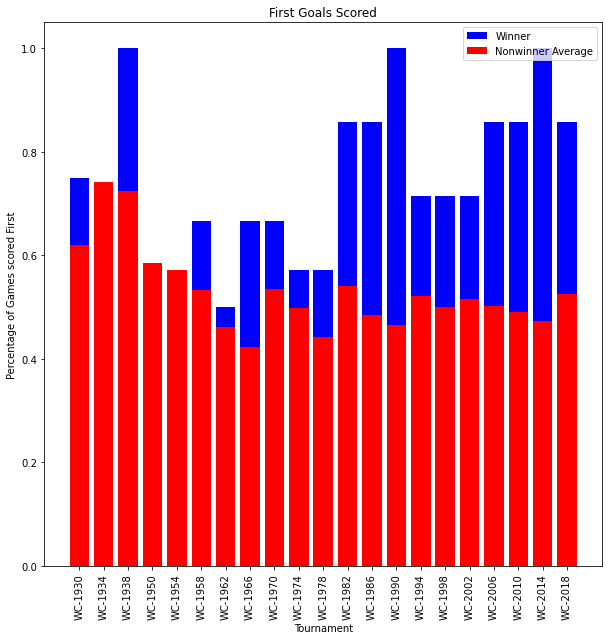

In [64]:
#graph build and display
plt.figure(figsize=(10,10))
plt.bar(tournaments , winner_firstGoal_count, color="b", label = "Winner")
plt.bar(tournaments , nonwinner_firstGoal_count, color="r", label="Nonwinner Average")
plt.xlabel('Tournament')
plt.ylabel('Percentage of Games scored First')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('First Goals Scored')
plt.show()

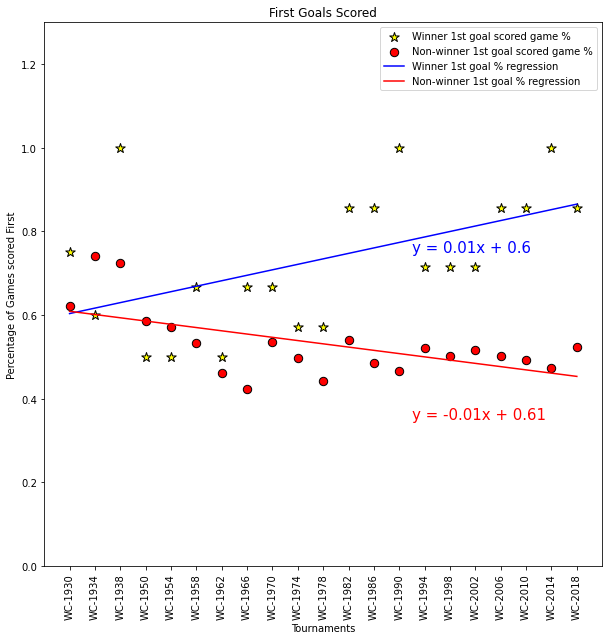

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(tournaments, winner_firstGoal_count , marker= '*',s =100, facecolors="yellow", edgecolors="black", label = "Winner")
plt.scatter(tournaments, nonwinner_firstGoal_count ,marker= 'o',s =70, facecolors="red", edgecolors="black", label = "Nonwinner Average")
plt.ylim(0,1.3)
plt.xlabel("Tournaments")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Games scored First")
plt.title("First Goals Scored")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( Time, winner_firstGoal_count )
regress_values = Time * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(Time,regress_values,"b-")
plt.annotate(line_eq,(13.5,0.75),fontsize=15,color="blue")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( Time, nonwinner_firstGoal_count )
regress_values = Time * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(Time,regress_values,"r-")
plt.annotate(line_eq,(13.5,0.35),fontsize=15,color="red")

#plt.legend(loc='best')
plt.legend( ( 'Winner 1st goal scored game %', 'Non-winner 1st goal scored game %', 'Winner 1st goal % regression', 'Non-winner 1st goal % regression' ) )
plt.show()

In [66]:
from scipy import stats

In [67]:
stats.ttest_ind(winner_firstGoal_count,nonwinner_firstGoal_count)

Ttest_indResult(statistic=5.083659010532954, pvalue=9.06583599928792e-06)

In [68]:

stats.ttest_ind(winner_firstGoal_count,nonwinner_firstGoal_count, equal_var=False)


Ttest_indResult(statistic=5.083659010532954, pvalue=1.9534484261017835e-05)